# REGRESIÓN LINEAL SIMPLE

# Importar las librerías

**Configuración del Entorno de Análisis:** Preparamos nuestro stack tecnológico estándar para ciencia de datos. Este conjunto de librerías nos permite realizar todo el pipeline: desde carga de datos hasta evaluación del modelo.

In [16]:
# Stack tecnológico para análisis de regresión
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split
# Importamos la función StandardScaler para normalizar las variables
from sklearn.preprocessing import StandardScaler
# Importamos la función LinearRegression de la librería sklearn para inicializar el modelo
from sklearn.linear_model import LinearRegression

# Configuración para visualizaciones más profesionales
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 11

# Análisis del Dataset: 50 Startups

**Contexto del Negocio:** Este dataset representa un caso de estudio clásico en el análisis de startups. Contiene métricas financieras clave de 50 empresas emergentes distribuidas en tres mercados importantes (Nueva York, California, Florida).

**Objetivo Analítico:** Determinar cuál de las inversiones (I+D, Marketing, Administración) tiene mayor impacto en la rentabilidad (Profit).

Este conjunto de datos tiene datos recopilados de Nueva York, California y Florida sobre 50 startups, 17 en cada estado. Las variables utilizadas en el conjunto de datos son  el beneficio, Gasto en I+D, Gasto en administración y Gasto en marketing. La variable objetivo a predecir en este caso va a ser el beneficio ("Profit").

In [17]:
# Cargamos el dataset de startups
dataset = pd.read_csv('../data/50_Startups.csv')

# Análisis exploratorio inicial - fundamental en cualquier proyecto de DS
print("=== ANÁLISIS EXPLORATORIO INICIAL ===")
print(f"Dimensiones del dataset: {dataset.shape}")
print(f"Número de startups: {dataset.shape[0]}")
print(f"Número de variables: {dataset.shape[1]}")

print("\nTipos de datos:")
print(dataset.dtypes)

print("\nValores nulos:")
print(dataset.isnull().sum())

=== ANÁLISIS EXPLORATORIO INICIAL ===
Dimensiones del dataset: (50, 5)
Número de startups: 50
Número de variables: 5

Tipos de datos:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

Valores nulos:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [18]:
# Exploramos la estructura y estadísticas descriptivas
print("=== MUESTRA DE DATOS ===")
print(dataset.head(10))

print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(dataset.describe())

print("\n=== DISTRIBUCIÓN POR ESTADO ===")
if 'State' in dataset.columns:
    print(dataset['State'].value_counts())
    
# Análisis de correlaciones preliminar
print("\n=== CORRELACIONES PRELIMINARES ===")
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()
print("Correlación con Profit:")
profit_corr = correlation_matrix['Profit'].sort_values(ascending=False)
print(profit_corr)

=== MUESTRA DE DATOS ===
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96

=== ESTADÍSTICAS DESCRIPTIVAS ===
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211

## Análisis Univariado: I+D vs Profit

**Hipótesis de Investigación:** La inversión en Investigación y Desarrollo debería tener un impacto significativo en la rentabilidad de las startups, ya que impulsa la innovación y ventaja competitiva.

**Estrategia Analítica:** Comenzamos con regresión lineal simple para aislar el efecto de una sola variable y entender su relación pura con el profit.

In [19]:
# Variable que utilizaremos para predecir la variable objetivo
X = dataset[["R&D Spend"]].values  # Feature: Inversión en I+D
# Variable objetivo
y = dataset["Profit"].values       # Target: Beneficio/Rentabilidad

print("=== ANÁLISIS DE VARIABLES SELECCIONADAS ===")
print(f"Feature (X): R&D Spend - Forma: {X.shape}")
print(f"Target (y): Profit - Forma: {y.shape}")

print(f"\nEstadísticas de R&D Spend:")
print(f"  Promedio: ${dataset['R&D Spend'].mean():,.0f}")
print(f"  Mediana: ${dataset['R&D Spend'].median():,.0f}")
print(f"  Desviación estándar: ${dataset['R&D Spend'].std():,.0f}")
print(f"  Rango: ${dataset['R&D Spend'].min():,.0f} - ${dataset['R&D Spend'].max():,.0f}")

print(f"\nEstadísticas de Profit:")
print(f"  Promedio: ${dataset['Profit'].mean():,.0f}")
print(f"  Mediana: ${dataset['Profit'].median():,.0f}")
print(f"  Desviación estándar: ${dataset['Profit'].std():,.0f}")
print(f"  Rango: ${dataset['Profit'].min():,.0f} - ${dataset['Profit'].max():,.0f}")

# Calculamos la correlación de Pearson
correlation = np.corrcoef(X.flatten(), y)[0,1]
print(f"\nCorrelación de Pearson: {correlation:.4f}")
if correlation > 0.7:
    print("  → Correlación fuerte positiva")
elif correlation > 0.5:
    print("  → Correlación moderada positiva")
elif correlation > 0.3:
    print("  → Correlación débil positiva")
else:
    print("  → Correlación muy débil o inexistente")

=== ANÁLISIS DE VARIABLES SELECCIONADAS ===
Feature (X): R&D Spend - Forma: (50, 1)
Target (y): Profit - Forma: (50,)

Estadísticas de R&D Spend:
  Promedio: $73,722
  Mediana: $73,051
  Desviación estándar: $45,902
  Rango: $0 - $165,349

Estadísticas de Profit:
  Promedio: $112,013
  Mediana: $107,978
  Desviación estándar: $40,306
  Rango: $14,681 - $192,262

Correlación de Pearson: 0.9729
  → Correlación fuerte positiva


In [20]:
X.shape

(50, 1)

# División Estratégica Train-Test

**Metodología de Validación:** Implementamos una división 70-30 (training-test) que es óptima para datasets de tamaño medio. Esto nos permite entrenar con suficientes datos mientras reservamos una muestra representativa para validación.

In [21]:
# División estratégica de datos - crítica para validación robusta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("=== VALIDACIÓN DE LA DIVISIÓN ===")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}%)")
print(f"Conjunto de test: {X_test.shape[0]} muestras ({X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}%)")

# Verificamos que la distribución se mantenga similar en ambos conjuntos
print(f"\nDistribución de R&D Spend:")
print(f"  Train - Media: ${np.mean(X_train):,.0f}, Std: ${np.std(X_train):,.0f}")
print(f"  Test  - Media: ${np.mean(X_test):,.0f}, Std: ${np.std(X_test):,.0f}")

print(f"\nDistribución de Profit:")
print(f"  Train - Media: ${np.mean(y_train):,.0f}, Std: ${np.std(y_train):,.0f}")
print(f"  Test  - Media: ${np.mean(y_test):,.0f}, Std: ${np.std(y_test):,.0f}")

# La similaridad en las distribuciones confirma una división representativa

=== VALIDACIÓN DE LA DIVISIÓN ===
Conjunto de entrenamiento: 35 muestras (70.0%)
Conjunto de test: 15 muestras (30.0%)

Distribución de R&D Spend:
  Train - Media: $72,901, Std: $48,789
  Test  - Media: $75,637, Std: $36,380

Distribución de Profit:
  Train - Media: $110,225, Std: $43,013
  Test  - Media: $116,183, Std: $31,068


In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 1) (15, 1) (35,) (15,)


# Entrenamiento del Modelo: I+D → Profit

**Modelado Estadístico:** Implementamos regresión lineal simple usando OLS (Ordinary Least Squares). El algoritmo encontrará los parámetros β₀ (intercept) y β₁ (slope) que minimizan el error cuadrático medio.

In [23]:
# Instanciamos y entrenamos el modelo de regresión lineal
regression = LinearRegression()
# Ajustamos el modelo a los datos de entrenamiento
regression.fit(X_train, y_train)

print("=== PARÁMETROS DEL MODELO ENTRENADO ===")
intercept = regression.intercept_
slope = regression.coef_[0]

print(f"Ecuación de la regresión: Profit = {intercept:.2f} + {slope:.4f} × R&D_Spend")
print(f"  • Intercept (β₀): ${intercept:,.2f}")
print(f"  • Slope (β₁): {slope:.4f} - Años de experiencia")

print(f"\n=== INTERPRETACIÓN EMPRESARIAL ===")
print(f"• Por cada $1 adicional invertido en I+D, el profit aumenta ${slope:.2f}")
print(f"• Una startup sin inversión en I+D tendría un profit base de ${intercept:,.2f}")
print(f"• ROI de I+D implícito: {slope:.1%} (por cada dólar invertido)")

# Calculamos R² en training para detectar posible overfitting
r2_train = regression.score(X_train, y_train)
print(f"\nR² en conjunto de entrenamiento: {r2_train:.4f}")
print(f"  El modelo explica {r2_train*100:.1f}% de la varianza en training")

=== PARÁMETROS DEL MODELO ENTRENADO ===
Ecuación de la regresión: Profit = 47660.73 + 0.8582 × R&D_Spend
  • Intercept (β₀): $47,660.73
  • Slope (β₁): 0.8582

=== INTERPRETACIÓN EMPRESARIAL ===
• Por cada $1 adicional invertido en I+D, el profit aumenta $0.86
• Una startup sin inversión en I+D tendría un profit base de $47,660.73
• ROI de I+D implícito: 85.8% (por cada dólar invertido)

R² en conjunto de entrenamiento: 0.9476
  El modelo explica 94.8% de la varianza en training


# Evaluación en Test Set

**Momento de la Verdad:** Aplicamos nuestro modelo entrenado a datos completamente nuevos. Esta es la prueba definitiva de la capacidad de generalización del modelo.

In [24]:
# Generamos predicciones para ambos conjuntos
y_pred_test = regression.predict(X_test)   # Lo que realmente importa
y_pred_train = regression.predict(X_train)  # Para comparar con test

print("=== EVALUACIÓN INICIAL ===")
print("Comparación de algunas predicciones:")
print("R&D Spend  | Profit Real | Profit Pred | Error    | Error %")
print("-" * 60)
for i in range(min(8, len(X_test))):
    error_abs = abs(y_test[i] - y_pred_test[i])
    error_pct = (error_abs / y_test[i]) * 100
    print(f"${X_test[i][0]:8,.0f} | ${y_test[i]:10,.0f} | ${y_pred_test[i]:10,.0f} | ${error_abs:7,.0f} | {error_pct:6.1f}%")

# Estadísticas rápidas de error
errors = y_test - y_pred_test
print(f"\nError promedio: ${np.mean(errors):,.2f}")
print(f"Error absoluto promedio: ${np.mean(np.abs(errors)):,.2f}")
print(f"Error absoluto promedio en %: {np.mean(np.abs(error_pct)):,.2f}%")
print(f"Error estándar: ${np.std(errors):,.2f}")

=== EVALUACIÓN INICIAL ===
Comparación de algunas predicciones:
R&D Spend  | Profit Real | Profit Pred | Error    | Error %
------------------------------------------------------------
$  66,052 | $   103,282 | $   104,347 | $  1,065 |    1.0%
$ 100,672 | $   144,259 | $   134,059 | $ 10,200 |    7.1%
$ 101,913 | $   146,122 | $   135,124 | $ 10,998 |    7.5%
$  27,893 | $    77,799 | $    71,599 | $  6,200 |    8.0%
$ 153,442 | $   191,050 | $   179,347 | $ 11,703 |    6.1%
$  72,108 | $   105,008 | $   109,545 | $  4,536 |    4.3%
$  20,230 | $    81,229 | $    65,022 | $ 16,207 |   20.0%
$  61,136 | $    97,484 | $   100,129 | $  2,645 |    2.7%

Error promedio: $3,609.13
Error absoluto promedio: $6,435.90
Error absoluto promedio en %: 2.71%
Error estándar: $6,979.37


# Visualizar los resultados de entrenamiento

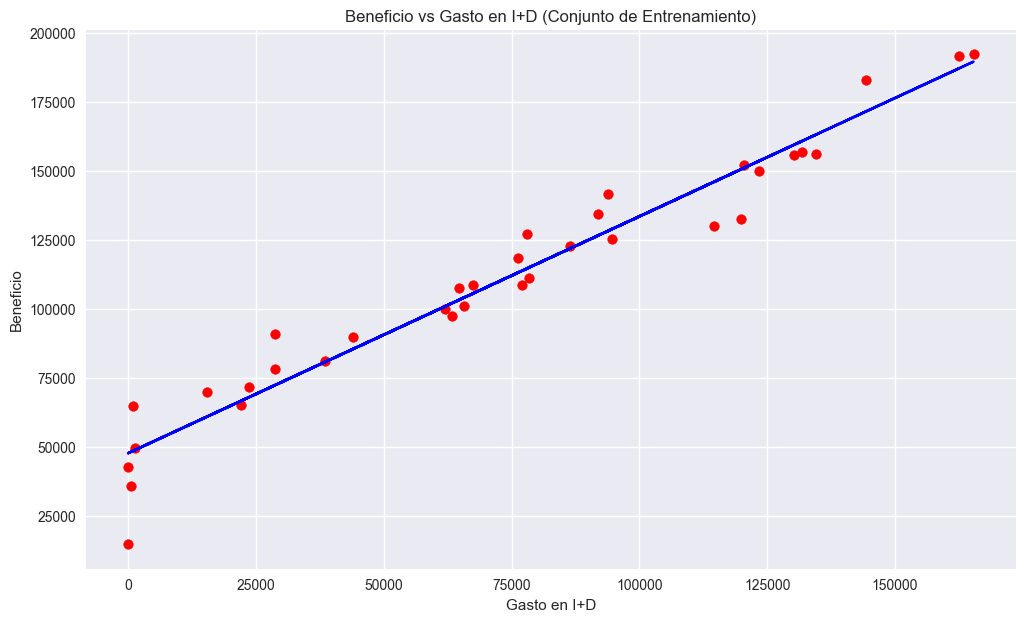

In [25]:
# Visualización profesional del ajuste en training
plt.figure(figsize=(12, 7))
plt.scatter(X_train, y_train, color="red", alpha=0.7, s=60, label="Startups (training)", edgecolors='darkred')
plt.plot(X_train, y_pred_train, color="blue", linewidth=2.5, label="Modelo de regresión lineal")

plt.title("Beneficio vs Gasto en I+D (Conjunto de Entrenamiento)", fontsize=14, fontweight='bold')
plt.xlabel("Gasto en I+D ($)", fontsize=12)
plt.ylabel("Beneficio ($)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Formatear ejes para mostrar valores monetarios
plt.ticklabel_format(style='plain', axis='both')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

print("💡 Interpretación: La línea representa nuestra hipótesis de que mayor inversión en I+D genera mayor profit")

# Visualizar los resultados de test

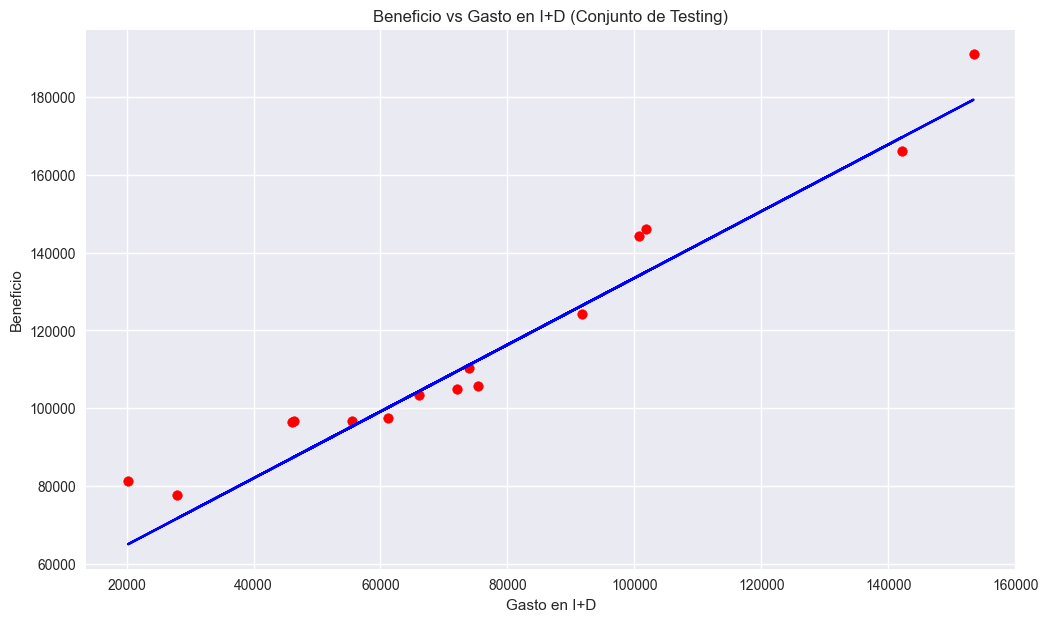

In [26]:
# Visualización crítica del rendimiento en test - EVALUACIÓN REAL
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color="red", alpha=0.8, s=60, label="Profit real", edgecolors='darkred')
plt.plot(X_test, y_pred_test, color="blue", linewidth=2.5, label="Profit predicho")

# Añadimos líneas de error para visualizar desviaciones
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred_test[i]], 'gray', alpha=0.5, linewidth=1)

plt.title("Beneficio vs Gasto en I+D (Conjunto de Testing)", fontsize=14, fontweight='bold')
plt.xlabel("Gasto en I+D ($)", fontsize=12)
plt.ylabel("Beneficio ($)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Formatear ejes para valores monetarios
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Agregar métricas en la gráfica
r2_test = regression.score(X_test, y_test)
textstr = f'R² Test = {r2_test:.3f}\nCapacidad de generalización'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("🎯 Las líneas grises muestran los errores de predicción para cada startup")
print(f"📊 Capacidad de generalización del modelo: R² = {r2_test:.3f}")

## Vemos el error cometido

In [27]:
errores = pd.DataFrame([y_test, y_pred_test, y_test-y_pred_test]).T
errores.columns = 'y_test', 'y_pred', 'error'
errores

,y_test,y_pred,error
0,103282.38,104347.290548,-1064.910548
1,144259.40,134059.153251,10200.246749
2,146121.95,135124.303984,10997.646016
3,77798.83,71598.917502,6199.912498
4,191050.39,179346.897268,11703.492732
5,105008.31,109544.723552,-4536.413552
6,81229.06,65022.114642,16206.945358
7,97483.56,100129.032061,-2645.472061
8,110352.25,111164.145387,-811.895387
9,166187.94,169619.715786,-3431.775786


## Calculamos el $R^2$ score o coeficiente de determinación

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

r2_ID = r2_score(y_test, y_pred_test)
r2_ID

0.9360398184741836

In [37]:
sqrt(mean_squared_error(y_test, y_pred_test))

7857.314472667481

# Nuevo objetivo "Gasto en Marketing"

Del dataset, únicamente nos vamos a quedar con la variable "Marketing Spend" como variable predictora y con la variable "Profit" como variable objetivo.

In [38]:
# Variable que utilizaremos para predecir la variable objetivo
X = dataset[["Marketing Spend"]].values
# Variable objetivo
y = dataset["Profit"].values

In [39]:
X.shape

(50, 1)

# Dividir el data set en conjunto de entrenamiento y conjunto de test

In [40]:
# Devidimos el dataset en train y test, dejando en test un tercio de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 1) (15, 1) (35,) (15,)


# Crear modelo de Regresión Lineal Simple con el conjunto de entrenamiento

In [42]:
# Generamos el modelo de regresión lineal
regression = LinearRegression()
# Le pasamos el conjunto de train
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predecir el conjunto de test

In [43]:
y_pred = regression.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

r2_mkt = r2_score(y_pred = y_pred, y_true = y_test)
r2_mkt

0.48255004122594336

Del dataset, únicamente nos vamos a quedar con la variable "Administration" como variable predictora y con la variable "Profit" como variable objetivo.

In [ ]:
# Variable que utilizaremos para predecir la variable objetivo
X = dataset[["Administration"]].values
# Variable objetivo
y = dataset["Profit"].values

In [ ]:
X.shape

(50, 1)

# Dividir el data set en conjunto de entrenamiento y conjunto de test

In [ ]:
# Devidimos el dataset en train y test, dejando en test un tercio de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 1) (15, 1) (35,) (15,)


# Crear modelo de Regresión Lineal Simple con el conjunto de entrenamiento

In [ ]:
# Generamos el modelo de regresión lineal
regression = LinearRegression()
# Le pasamos el conjunto de train
regression.fit(X_train, y_train)

LinearRegression()

# Predecir el conjunto de test

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2_adm = r2_score(y_pred = y_pred, y_true = y_test)
r2_adm

-0.6574876270036156

In [ ]:
print(f"I+D: {r2_ID}, Marketing: {r2_mkt}, Administración: {r2_adm}")

I+D: 0.9360398184741837, Marketing: 0.48255004122594336, Administración: -0.6574876270036156
